In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# # placeholder 
# X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
# Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
# #rate=tf.placeholder(dtype=tf.float32)
# keep_prob = tf.placeholder(dtype=tf.float32)

# X_img = tf.reshape(X, [-1, 28, 28, 1])
# ## 2.2.1 Convolution Layer1
# # kernel_size 는 필터의 크기
# L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
# print(L1.shape)
# L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)
# print(L1.shape)



# ## 2.2.1 Convolution Layer2
# L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
# print(L2.shape)
# L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)
# print(L2.shape)

# ## (?, 7, 7, 64)

# ## 2.3 Neural Network
# L2 = tf.reshape(L2,[-1,7*7*32])

# # shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
# W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
# b1 = tf.Variable(tf.random_normal([256]), name='bias1')
# _layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
# layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


# W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
# b2 = tf.Variable(tf.random_normal([10]), name='bias2')

# #Hypothesis
# logits = tf.matmul(layer1, W2) + b2

# H = tf.nn.relu(logits)

# # cost Function
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# # train
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# train = optimizer.minimize(cost)


# # Session & 초기화
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('./model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())


# # 학습
# training_echo = 30
# batch_size = 100

# for step in range(training_echo):
#     num_of_iter = int(mnist.train.num_examples / batch_size)
#     cost_val = 0
#     for i in range(num_of_iter):
#         batch_x, batch_y = mnist.train.next_batch(batch_size)
#         _,cost_val = sess.run([train,cost], feed_dict = {X:batch_x,Y:batch_y, keep_prob:0.7})
#     if step % 1 ==0:
#         print(cost_val)
# saver.save(sess, './model4/cnn_model.ckpt', global_step=1000)


# Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1)) # -> 두 개의 인자가 같아야 예측이 잘 수행된 것
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:0.7})
print(result)
print('정확도 : {}'.format(result))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


NameError: name 'saver' is not defined

In [1]:
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

img = Image.open('./data/number/0.png')

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

io.imshow(img_test)
plt.show()

img_test = img_test.astype(np.float32)

test_img = img_test.reshape(-1, 784)
display(test_img)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result2)
print(result)

<Figure size 640x480 with 1 Axes>

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

NameError: name 'tf' is not defined

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
#rate=tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

X_img = tf.reshape(X, [-1, 28, 28, 1])
## 2.2.1 Convolution Layer1
# kernel_size 는 필터의 크기
L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)

## 2.2.1 Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)

## 2.3 Neural Network
L2 = tf.reshape(L2,[-1,7*7*32])

# shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
_layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10]), name='bias2')

#Hypothesis
logits = tf.matmul(layer1, W2) + b2

H = tf.nn.relu(logits)

# cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('./model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

img = Image.open('./data/number/1.png')
#img = Image.open(sys.argv[1])

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)


img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result)
#print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from ./model4\cnn_model.ckpt-1000
[1]


In [136]:
## 저장데이터 불러와보기

import tensorflow as tf
import numpy as np
import pandas as pd

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# # placeholder 
# X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
# Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
# #rate=tf.placeholder(dtype=tf.float32)
# keep_prob = tf.placeholder(dtype=tf.float32)

# X_img = tf.reshape(X, [-1, 28, 28, 1])
# ## 2.2.1 Convolution Layer1
# # kernel_size 는 필터의 크기
# L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
# print(L1.shape)
# L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)
# print(L1.shape)



# ## 2.2.1 Convolution Layer2
# L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
# print(L2.shape)
# L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)
# print(L2.shape)

# ## (?, 7, 7, 64)

# ## 2.3 Neural Network
# L2 = tf.reshape(L2,[-1,7*7*32])

# # shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
# W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
# b1 = tf.Variable(tf.random_normal([256]), name='bias1')
# _layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
# layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


# W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
# b2 = tf.Variable(tf.random_normal([10]), name='bias2')

# #Hypothesis
# logits = tf.matmul(layer1, W2) + b2

# H = tf.nn.relu(logits)

# # cost Function
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# # train
# optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
# train = optimizer.minimize(cost)


# # Session & 초기화
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

saver = tf.train.import_meta_graph('./model4/cnn_model.ckpt-1000.meta')

ckpt = tf.train.get_checkpoint_state('./model4')
# tf.reset_default_graph()

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./model4/cnn_model.ckpt-1000.meta')
    new_saver.restore(sess, ckpt.model_checkpoint_path)


# saver = tf.train.Saver()
# global_step = tf.Variable(0, trainable=False, name='global_step')

# ckpt = tf.train.get_checkpoint_state('./model4')
# if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
#     saver.restore(sess, ckpt.model_checkpoint_path)
# else : 
#     sess.run(tf.global_variables_initializer())

# Accuracy 측정
# predict = tf.argmax(H,1)
# correct = tf.equal(predict, tf.argmax(Y,1)) # -> 두 개의 인자가 같아야 예측이 잘 수행된 것
# accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# result = sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:0.7})
print(result)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from ./model4\cnn_model.ckpt-1000
[2]


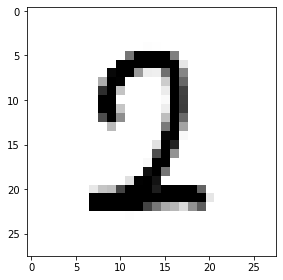

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder:0", shape=(?, 784), dtype=float32) is not an element of this graph.

In [95]:
img = Image.open('./data/number/2.png')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

io.imshow(img_test)
plt.show()

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result2)
print(result)

In [98]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
#rate=tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

X_img = tf.reshape(X, [-1, 28, 28, 1])
## 2.2.1 Convolution Layer1
# kernel_size 는 필터의 크기
L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)

## 2.2.1 Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)

## 2.3 Neural Network
L2 = tf.reshape(L2,[-1,7*7*32])

# shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
_layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10]), name='bias2')

#Hypothesis
logits = tf.matmul(layer1, W2) + b2

H = tf.nn.relu(logits)

# cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('./model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

img = Image.open('./data/number/5.png')
# img = Image.open(sys.argv[1])

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result)
#print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from ./model4\cnn_model.ckpt-1000
[5]


In [97]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
#rate=tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

X_img = tf.reshape(X, [-1, 28, 28, 1])
## 2.2.1 Convolution Layer1
# kernel_size 는 필터의 크기
L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)

## 2.2.1 Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)

## 2.3 Neural Network
L2 = tf.reshape(L2,[-1,7*7*32])

# shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
_layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10]), name='bias2')

#Hypothesis
logits = tf.matmul(layer1, W2) + b2

H = tf.nn.relu(logits)

# cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# saver = tf.train.Saver()

# Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1)) # -> 두 개의 인자가 같아야 예측이 잘 수행된 것
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

result = sess.run(accuracy, feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:0.7})
print(result)

# saver = tf.train.import_meta_graph('./model4/cnn_model.ckpt-1000.meta')

# ckpt = tf.train.get_checkpoint_state('./model4')
# # tf.reset_default_graph()

# with tf.Session() as sess:
#     new_saver = tf.train.import_meta_graph('./model4/cnn_model.ckpt-1000.meta')
#     new_saver.restore(sess, ckpt.model_checkpoint_path)
    
    
    
    
    


# global_step = tf.Variable(0, trainable=False, name='global_step')

# ckpt = tf.train.get_checkpoint_state('./model4')
# if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
#     saver.restore(sess, ckpt.model_checkpoint_path)
# else : 
#     sess.run(tf.global_variables_initializer())

# img = Image.open('./data/number/0.png')
# # img = Image.open(sys.argv[1])

# img_test =  img.resize((28,28))
# img = np.array(img_test)
# img_test = color.rgb2gray(img)

# img_test = img_test.astype(np.float32)
# test_img = img_test.reshape(-1, 784)
# test_img = 1-test_img

# predict = tf.argmax(H,1)
# result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
# result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
# print(result)
# #print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
0.09969091


In [132]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
#rate=tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

X_img = tf.reshape(X, [-1, 28, 28, 1])
## 2.2.1 Convolution Layer1
# kernel_size 는 필터의 크기
L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)

## 2.2.1 Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)

## 2.3 Neural Network
L2 = tf.reshape(L2,[-1,7*7*32])

# shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
_layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10]), name='bias2')

#Hypothesis
logits = tf.matmul(layer1, W2) + b2

H = tf.nn.relu(logits)

# cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('C:\python_ML\model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

img = Image.open('./data/number/1.png')
# img = Image.open(sys.argv[1])

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result)
#print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from C:\python_ML\model4\cnn_model.ckpt-1000
[1]


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)

# placeholder 
X = tf.placeholder(shape=[None, 784], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype=tf.float32)
#rate=tf.placeholder(dtype=tf.float32)
keep_prob = tf.placeholder(dtype=tf.float32)

X_img = tf.reshape(X, [-1, 28, 28, 1])
## 2.2.1 Convolution Layer1
# kernel_size 는 필터의 크기
L1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding='SAME', strides=2)

## 2.2.1 Convolution Layer2
L2 = tf.layers.conv2d(inputs=L1, filters=32, kernel_size=[3,3], padding='SAME', strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding='SAME', strides=2)

## 2.3 Neural Network
L2 = tf.reshape(L2,[-1,7*7*32])

# shape [, logist의 개수 (logist layer에 얼마나 많이 분포 하는지 )]
W1 = tf.get_variable('weight1', shape=[7*7*32,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name='bias1')
_layer1 = tf.nn.relu(tf.matmul(L2, W1)+b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_prob) 


W2 = tf.get_variable('weight2', shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([10]), name='bias2')

#Hypothesis
logits = tf.matmul(layer1, W2) + b2

H = tf.nn.relu(logits)

# cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


# train
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)


# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()

global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('C:\python_ML\model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

img = Image.open('./data/number/2.png')
# img = Image.open(sys.argv[1])

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result)
#print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from C:\python_ML\model4\cnn_model.ckpt-1000
[2]


In [158]:
print(X)
print(predict)
print(H)
print(keep_prob)




Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("ArgMax_14:0", shape=(?,), dtype=int64)
Tensor("Relu_1:0", shape=(?, 10), dtype=float32)
Tensor("Placeholder_2:0", dtype=float32)


In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
from skimage import io, color
from PIL import Image
from matplotlib import pyplot as plt
import sys

# 싸이키런
from sklearn.preprocessing import MinMaxScaler
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

# Data Loading
mnist= input_data.read_data_sets('./data/mnist', one_hot=True)


global_step = tf.Variable(0, trainable=False, name='global_step')

ckpt = tf.train.get_checkpoint_state('C:\python_ML\model4')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else : 
    sess.run(tf.global_variables_initializer())

img = Image.open('./data/number/99.png')
# img = Image.open(sys.argv[1])

img_test =  img.resize((28,28))
img = np.array(img_test)
img_test = color.rgb2gray(img)

img_test = img_test.astype(np.float32)
test_img = img_test.reshape(-1, 784)
test_img = 1-test_img

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_img,keep_prob:0.3 })
result2 = sess.run(H, feed_dict={X:test_img,keep_prob:0.3})
print(result)


#print(result2)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from C:\python_ML\model4\cnn_model.ckpt-1000
[6]
